# Machine Learning (second part): Intermediate report

In [1]:
student_name='QIAN ZECHANG'
student_id='20M31355'

# 1. Multi-class classification on MNIST

In [30]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [32]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train/255
X_test=X_test/255
y_t=y_test
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [67]:
class CNN(object):
    def __init__(self):
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model = model

In [68]:
cnn=CNN().model
cnn.fit(X_train, y_train, batch_size=128, epochs=1)
score=cnn.evaluate(X_test,y_test)

Train on 60000 samples
10000/10000 [==============================] - 1s 119us/sample - loss: 0.0742 - accuracy: 0.9755


In [69]:
print('accuracy',score[1])

accuracy 0.9755


# 2. Confusion matrix

In [70]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = cnn.predict_classes(X_test)
true_classes = y_t
print(confusion_matrix(true_classes, predict_classes))

[[ 977    0    0    0    0    1    1    0    0    1]
 [   1 1128    1    1    0    2    1    0    1    0]
 [  12    5  986    7    0    0    2    8   12    0]
 [   2    0    1  989    0   11    0    1    3    3]
 [   2    0    0    1  959    0   12    0    2    6]
 [   2    0    0    1    0  884    3    1    1    0]
 [   6    1    0    0    1    5  945    0    0    0]
 [   2    9    4   13    0    1    0  968    5   26]
 [   7    1    1    3    1    6    2    0  944    9]
 [   5    3    0    3    4   16    1    0    2  975]]


# 3. Top-3 easy and confusing examples

In [205]:
diff=[]
for k,v in enumerate(predict_classes):
    if v != y_t[k]:
        a=cnn.predict(X_test[k].reshape(1,28,28,1))
        a_list=a.tolist()
        i=a_list[0].index(max(a_list[0]))
        diff.append([k,i,max(a_list[0])])


In [ ]:
same=[]
for k,v in enumerate(predict_classes):
    if v == y_t[k]:
        a=cnn.predict(X_test[k].reshape(1,28,28,1))
        a_list=a.tolist()
        i=a_list[0].index(max(a_list[0]))
        same.append([k,i,max(a_list[0])])


In [144]:
con=[]
easy=[]
for i in range(3):
    diff_max=np.array(diff)[:,2].max()
    max_index=np.argwhere(np.array(diff)==diff_max)[0,0]
    con.append(diff[max_index])
    diff.remove(diff[max_index])
    
    same_max=np.array(same)[:,2].max()
    max_index=np.argwhere(np.array(same)==same_max)[0,0]
    easy.append(same[max_index])
    same.remove(same[max_index])
    
print(con)
print(easy)

[[2098, 0, 0.9980484247207642], [6505, 0, 0.9960359930992126], [2896, 0, 0.9957102537155151]]
[[6127, 0, 0.9999998807907104], [71, 0, 0.9999997615814209], [1804, 3, 0.9999997615814209]]


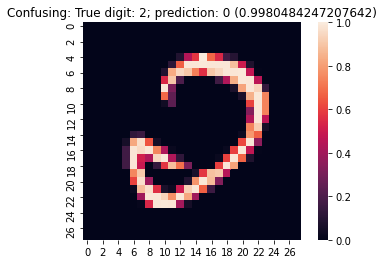

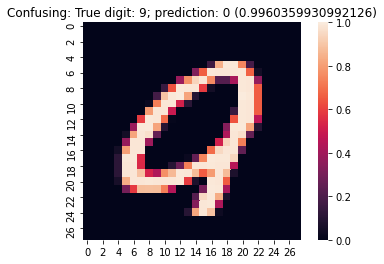

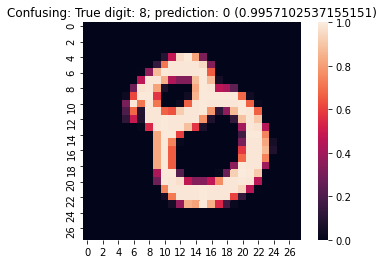

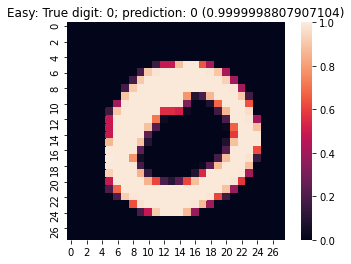

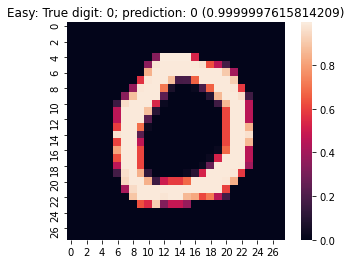

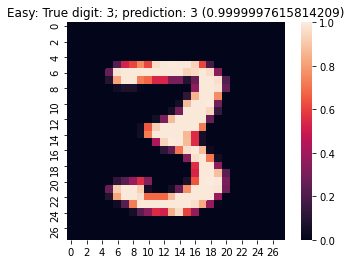

In [149]:
import seaborn as sn
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure()
    sn.heatmap(X_test[con[i][0]].reshape(28,28),square = True)
    plt.title('Confusing: True digit: '+str(y_t[con[i][0]])+'; prediction: '+
             str(con[i][1])+' ('+str(con[i][2])+')')
    plt.show()
for i in range(3):
    plt.figure()
    sn.heatmap(X_test[easy[i][0]].reshape(28,28),square = True)
    plt.title('Easy: True digit: '+str(y_t[easy[i][0]])+'; prediction: '+
             str(easy[i][1])+' ('+str(easy[i][2])+')')
    plt.show()

# 4. Recognize your handwritten digits

Image #1

<function skimage.io._io.show()>

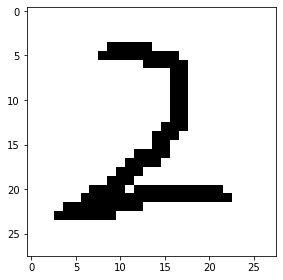

In [199]:
from skimage import io
image=io.imread('2.png')
io.imshow(image)
io.show

In [200]:
image=image[:,:,0]
image=image/255
image=np.abs(image-1)
p=cnn.predict(image.reshape(1,28,28,1))
print('digit:',np.where(p==max(p[0]))[1][0])
print('probability:',max(p[0]))

digit: 2
probability: 0.99961334


Image #2

<function skimage.io._io.show()>

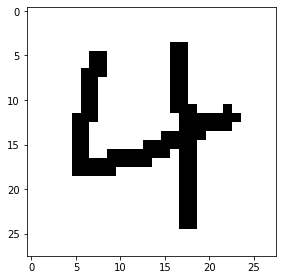

In [201]:
from skimage import io
image=io.imread('4.png')
io.imshow(image)
io.show

In [202]:
image=image[:,:,0]
image=image/255
image=np.abs(image-1)
p=cnn.predict(image.reshape(1,28,28,1))
print('digit:',np.where(p==max(p[0]))[1][0])
print('probability:',max(p[0]))

digit: 4
probability: 0.99994564


Image #3

<function skimage.io._io.show()>

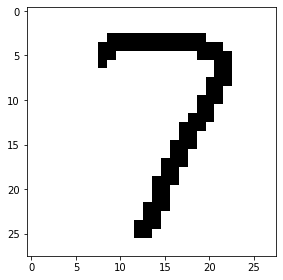

In [203]:
from skimage import io
image=io.imread('7.png')
io.imshow(image)
io.show

In [204]:
image=image[:,:,0]
image=image/255
image=np.abs(image-1)
p=cnn.predict(image.reshape(1,28,28,1))
print('digit:',np.where(p==max(p[0]))[1][0])
print('probability:',max(p[0]))

digit: 7
probability: 0.5140897
